In [1]:
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np


path = r'alpha-one-channel/01.csv'
fs = 200 # recording frequency of OpenBCI Ganglion

In [2]:
sample = pd.read_csv(path, sep=',', header=None)
d = sample.as_matrix()
channel = d[:,2].astype(np.float)# 2 is index of channel 0
channel

array([1.04851081, 1.04716444, 1.09518663, ..., 1.07802797, 1.11467711,
       1.10404832])

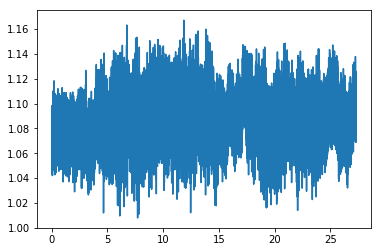

In [3]:
time = np.linspace(0, len(channel)/fs, len(channel))
plt.plot(time, channel)

In [4]:
def bandpass(start, stop, data, fs):
    bp_Hz = np.array([start, stop])
    b, a = signal.butter(5, bp_Hz / (fs / 2.0), btype='bandpass')
    return signal.lfilter(b, a, data, axis=0)


def notch(val, data, fs):
    bp_stop_Hz = [float(val)] + 3.0 * np.array([-1, 1])
    b, a = signal.butter(3, bp_stop_Hz / (fs / 2.0), 'bandstop')
    fin = signal.lfilter(b, a, data)
    return fin

In [5]:
notch_val = 50
band = (7,13) # band of alpha waves
data_filt_band = bandpass(band[0], band[1], channel, fs)#applied bandpass on raw data
data_filt_notch = notch(notch_val, channel, fs)#applied notch on raw data
data_filt = notch(notch_val,data_filt_band, fs)# filtered data

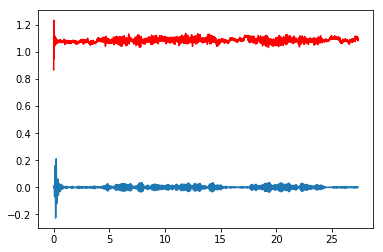

In [6]:
plt.plot(time, data_filt_band)
plt.plot(time, data_filt_notch, color = 'r')

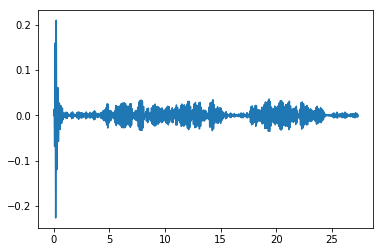

In [7]:
plt.plot(time, data_filt)# final filtered data

In [8]:
chunk_lenght = 400

def fft(data, fs):
    L = len(data)
    freq = np.linspace(0.0, 1.0 / (2.0 * fs **-1), int(L / 2))
    yi = np.fft.fft(data)#[1:]
    y = yi[range(int(L / 2))]
    return freq, abs(y)

def split(channel_data, chunk_len, fs):
    chunks = len(channel_data) // chunk_len
    if chunks == 0:
        chunks = 1
    data = np.array_split(channel_data, chunks)
    return data

In [9]:
ffts = []
splited = split(data_filt,chunk_lenght, fs)#split data into chunks
for dat in splited:
    ffts.append(fft(dat,fs))#analyze frequency of each chunk

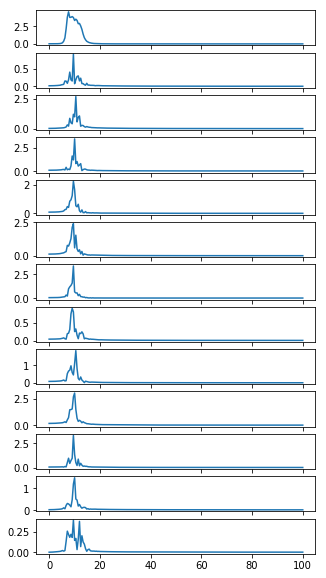

In [10]:
fig, axes = plt.subplots(nrows=len(ffts), figsize = (5, 10))
for i in range(len(ffts)):
    axes[i].plot(ffts[i][0], ffts[i][1])